In [84]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
from scipy.ndimage import uniform_filter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.ticker import ScalarFormatter, NullFormatter
import metpy.calc as mpcalc
from metpy.units import units
from matplotlib.legend import Legend

In [2]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

In [3]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

In [4]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def get_angles(DDM_gt_00_0507,NWP_gt_00_0507,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP):
    u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
    u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)
    
    u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
    u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)
    
    v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
    v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)
    
    v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
    v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)
    angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

def block_average(data, factor_smoothing):
    kernel_size = 2 * factor_smoothing + 1
    smoothed_data = uniform_filter(data, size=kernel_size, mode='nearest')
    return smoothed_data


def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    #latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    #longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl

def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    #latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    #longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles)           

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    #angle_rotation = -np.pi/13.75831 to correct projection of wind components
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)             

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl

def get_geopotential_arrays(pl_selected, angles, LAT_DDM, LON_DDM, LAT_NWP, LON_NWP,
                            data_pred_NWP, data_gt_NWP, lead_time_NWP,
                            data_pred_DDM, data_gt_DDM, lead_time_DDM):

    # Load and prepare NWP data
    latitude_NWP, longitude_NWP, Phi_pred_NWP_f1, u_pred_NWP_f1, v_pred_NWP_f1, \
    Phi_gt_NWP_f1, u_gt_NWP_f1, v_gt_NWP_f1 = prepare_datasets_NWP(
        data_pred_NWP, data_gt_NWP, lead_time_NWP, LAT_NWP, LON_NWP, pl_selected
    )

    # Load and prepare DDM data
    latitude_DDM, longitude_DDM, Phi_pred_DDM_f1, u_pred_DDM_f1, v_pred_DDM_f1, \
    Phi_gt_DDM_f1, u_gt_DDM_f1, v_gt_DDM_f1 = prepare_datasets_DDM(
        angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, LAT_DDM, LON_DDM, pl_selected
    )

    # Smoothed geopotential heights
    Phi_pred_NWP_f13 = block_average(Phi_pred_NWP_f1, 6)
    Phi_pred_DDM_f13 = block_average(Phi_pred_DDM_f1, 6)
    Phi_gt_NWP_f13 = block_average(Phi_gt_NWP_f1, 6)
    Phi_gt_DDM_f13 = block_average(Phi_gt_DDM_f1, 6)

    # Differences (before - after smoothing)
    diff_Phi_f1f13_NWP = Phi_pred_NWP_f1 - Phi_pred_NWP_f13
    diff_Phi_f1f13_DDM = Phi_pred_DDM_f1 - Phi_pred_DDM_f13
    diff_Phi_f1f13_gt_NWP = Phi_gt_NWP_f1 - Phi_gt_NWP_f13
    diff_Phi_f1f13_gt_DDM = Phi_gt_DDM_f1 - Phi_gt_DDM_f13

    # Return all arrays
    return (
        Phi_pred_NWP_f1, Phi_pred_DDM_f1,
        Phi_gt_NWP_f1, Phi_gt_DDM_f1,
        Phi_pred_NWP_f13, Phi_pred_DDM_f13,
        Phi_gt_NWP_f13, Phi_gt_DDM_f13,
        diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM,
        diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM
    ) 

def get_std_per_lt(pl_levels, data_pred_NWP, data_gt_NWP, lt_NWP, data_pred_DDM, data_gt_DDM, lt_DDM):
    std_pred_NWP_LIST = []
    std_gt_LIST = []
    std_pred_DDM_LIST = []
    for pl_selected in pl_levels:        
        Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, data_pred_NWP, data_gt_NWP, lt_NWP, data_pred_DDM, data_gt_DDM, lt_DDM) 
        std_pred_NWP_LIST.append(np.std(diff_Phi_f1f13_NWP))
        std_gt_LIST.append(np.std(diff_Phi_f1f13_gt_DDM))
        std_pred_DDM_LIST.append(np.std(diff_Phi_f1f13_DDM))
    return std_pred_NWP_LIST, std_gt_LIST, std_pred_DDM_LIST




In [5]:
LAT_DDM = [7,450]
LON_DDM = [7,450]
LAT_NWP = [8,451]
LON_NWP = [8,451]

angles = get_angles(DDM_gt_00_0507,NWP_gt_00_0507,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP)

In [6]:
pl_selected = 200
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
pl_selected = 300
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
pl_selected = 400
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
pl_selected = 500
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
pl_selected = 700
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
pl_selected = 850
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)


data_list = [diff_Phi_f1f13_NWP,diff_Phi_f1f13_gt_DDM,diff_Phi_f1f13_DDM]

In [7]:
# Prepare data for all pressure levels
pressure_levels = [150, 200, 250, 300, 400, 500, 700, 850, 925]
all_data_lists = []

for pl_selected in pressure_levels:
    Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(
        pl_selected, angles, LAT_DDM, LON_DDM, LAT_NWP, LON_NWP, 
        NWP_pred_18_0407, NWP_gt_00_0507, 6, DDM_pred_18_0407, DDM_gt_00_0507, 1)
    
    all_data_lists.append([diff_Phi_f1f13_NWP, diff_Phi_f1f13_gt_DDM, diff_Phi_f1f13_DDM])

# Find global min and max across all pressure levels
global_min = min(np.nanmin(data.flatten()) for sublist in all_data_lists for data in sublist)
global_max = max(np.nanmax(data.flatten()) for sublist in all_data_lists for data in sublist)

In [8]:
#06 UTC
pl_levels = [1000,925,850,700,500,400,300,250,200,100,50]  #add 50 if you also want 50 hPa

#gt 06UTC (abs)
std_pred_NWP_LIST_6, std_gt_LIST_6, std_pred_DDM_LIST_6 = get_std_per_lt(pl_levels, NWP_pred_00_0507, NWP_gt_06_0507, 6, DDM_pred_00_0507, DDM_gt_06_0507, 1)
std_pred_NWP_LIST_12, std_gt_LIST_12, std_pred_DDM_LIST_12 = get_std_per_lt(pl_levels, NWP_pred_18_0407, NWP_gt_06_0507, 12, DDM_pred_18_0407, DDM_gt_06_0507, 2)
std_pred_NWP_LIST_18, std_gt_LIST_18, std_pred_DDM_LIST_18 = get_std_per_lt(pl_levels, NWP_pred_12_0407, NWP_gt_06_0507, 18, DDM_pred_12_0407, DDM_gt_06_0507, 3)
std_pred_NWP_LIST_24, std_gt_LIST_24, std_pred_DDM_LIST_24 = get_std_per_lt(pl_levels, NWP_pred_06_0407, NWP_gt_06_0507, 24, DDM_pred_06_0407, DDM_gt_06_0507, 4)
std_pred_NWP_LIST_30, std_gt_LIST_30, std_pred_DDM_LIST_30 = get_std_per_lt(pl_levels, NWP_pred_00_0407, NWP_gt_06_0507, 30, DDM_pred_00_0407, DDM_gt_06_0507, 5)
std_pred_NWP_LIST_36, std_gt_LIST_36, std_pred_DDM_LIST_36 = get_std_per_lt(pl_levels, NWP_pred_18_0307, NWP_gt_06_0507, 36, DDM_pred_18_0307, DDM_gt_06_0507, 6)
std_pred_NWP_LIST_42, std_gt_LIST_42, std_pred_DDM_LIST_42 = get_std_per_lt(pl_levels, NWP_pred_12_0307, NWP_gt_06_0507, 42, DDM_pred_12_0307, DDM_gt_06_0507, 7)
std_pred_NWP_LIST_48, std_gt_LIST_48, std_pred_DDM_LIST_48 = get_std_per_lt(pl_levels, NWP_pred_06_0307, NWP_gt_06_0507, 48, DDM_pred_06_0307, DDM_gt_06_0507, 8)
std_pred_NWP_LIST_54, std_gt_LIST_54, std_pred_DDM_LIST_54 = get_std_per_lt(pl_levels, NWP_pred_00_0307, NWP_gt_06_0507, 54, DDM_pred_00_0307, DDM_gt_06_0507, 9)
std_pred_NWP_LIST_60, std_gt_LIST_60, std_pred_DDM_LIST_60 = get_std_per_lt(pl_levels, NWP_pred_18_0207, NWP_gt_06_0507, 60, DDM_pred_18_0207, DDM_gt_06_0507, 10)
std_pred_NWP_LIST_66, std_gt_LIST_66, std_pred_DDM_LIST_66 = get_std_per_lt(pl_levels, NWP_pred_12_0207, NWP_gt_06_0507, 66, DDM_pred_12_0207, DDM_gt_06_0507, 11)

std_pred_NWP_matrix_lt_pl = np.array([
    std_pred_NWP_LIST_6,
    std_pred_NWP_LIST_12,
    std_pred_NWP_LIST_18,
    std_pred_NWP_LIST_24,
    std_pred_NWP_LIST_30,
    std_pred_NWP_LIST_36,
    std_pred_NWP_LIST_42,
    std_pred_NWP_LIST_48,
    std_pred_NWP_LIST_54,
    std_pred_NWP_LIST_60,
    std_pred_NWP_LIST_66
])

#of course the gt have to be all equal if the code is correct (you have verified it) => you can take just one of them 
std_gt_LIST = std_gt_LIST_6

std_pred_DDM_matrix_lt_pl = np.array([
    std_pred_DDM_LIST_6,
    std_pred_DDM_LIST_12,
    std_pred_DDM_LIST_18,
    std_pred_DDM_LIST_24,
    std_pred_DDM_LIST_30,
    std_pred_DDM_LIST_36,
    std_pred_DDM_LIST_42,
    std_pred_DDM_LIST_48,
    std_pred_DDM_LIST_54,
    std_pred_DDM_LIST_60,
    std_pred_DDM_LIST_66
])

In [53]:
def plot_std_abs_profiles_combined(std_pred_NWP_matrix, std_pred_DDM_matrix, std_gt_LIST,
                                 pl_levels=None, labels=None, save_path=''):
    if pl_levels is None:
        pl_levels = [925, 850, 700, 500, 400, 300, 250, 200, 100, 50]

    desired_ticks = [1000, 850, 700, 500, 400, 300, 250, 200, 100, 50]

    num_leadtimes = std_pred_NWP_matrix.shape[0]
    if labels is None:
        labels = [f'Leadtime {i}' for i in range(num_leadtimes)]

    fig, ax = plt.subplots(figsize=(6, 5))

    blues = cm.Blues(np.linspace(0.4, 1, num_leadtimes))
    greens = cm.Greens(np.linspace(0.4, 1, num_leadtimes))

    nwp_handles = []
    ddm_handles = []

    for i in range(num_leadtimes):
        line_nwp, = ax.plot(std_pred_NWP_matrix[i, :], pl_levels, color=blues[i])
        nwp_handles.append(line_nwp)

    for i in range(num_leadtimes):
        line_ddm, = ax.plot(std_pred_DDM_matrix[i, :], pl_levels, color=greens[i])
        ddm_handles.append(line_ddm)

    gt_line = ax.plot(std_gt_LIST, pl_levels, color='orange',
                      linewidth=2.5, label='Analysis')[0]

    ax.set_ylabel('pl (hPa)', fontsize=12)
    ax.set_ylim(max(pl_levels), min(pl_levels))
    ax.set_yscale('log')
    ax.set_yticks(desired_ticks)
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    ax.get_yaxis().set_minor_formatter(NullFormatter())

    ax.grid(True)

    x_vals = ax.get_xticks()
    ax.set_xticklabels([f"{val:.1f}" for val in x_vals], rotation=45)
    ax.set_xlabel(r'Std{$\Phi_{f1} - \Phi_{f13}$}$_{pl,\,lt}$ ($m^{2}s^{-2}$)',
                  fontsize=14)

    primary_legend = ax.legend(handles=[gt_line], loc='center left',
                               bbox_to_anchor=(0.96, 0.86), fontsize='small')
    ax.add_artist(primary_legend)

    all_handles = nwp_handles + ddm_handles
    all_labels = [f'NWP {lbl}' for lbl in labels] + [f'DDM {lbl}' for lbl in labels]

    secondary_legend = Legend(ax, all_handles, all_labels,
                              loc='center left', bbox_to_anchor=(0.96, 0.5),
                              ncol=2, fontsize='small',
                              columnspacing=0.6, handlelength=1.2, handletextpad=0.1)
    ax.add_artist(secondary_legend)

    plt.tight_layout(rect=[0, 0, 0.78, 1])
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    return fig


C:\Users\User\AppData\Local\Temp\ipykernel_2068\2109471111.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{val:.1f}" for val in x_vals], rotation=45)


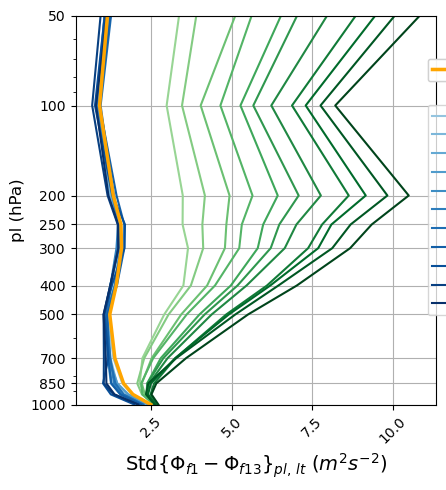

In [54]:
save_path = r"C:\Users\User\Documents\Paper_KNMI\Images_for_paper_high_resolution_adjusted\Fig10_Std.png"

fig = plot_std_abs_profiles_combined(
    std_pred_NWP_matrix=std_pred_NWP_matrix_lt_pl,
    std_pred_DDM_matrix=std_pred_DDM_matrix_lt_pl,
    std_gt_LIST=std_gt_LIST_6,  
    pl_levels=[1000, 925, 850, 700, 500, 400, 300, 250, 200, 100, 50],
    labels=[
        '6h', '12h', '18h', '24h', '30h', '36h', '42h', '48h', '54h', '60h', '66h'
    ],
    save_path = save_path
)

In [106]:
import matplotlib.ticker as mticker

def plot_geopotential_three_panel(NWP_data, DDM_data, 
                                 NWP_lat_range, NWP_lon_range,
                                 DDM_lat_range, DDM_lon_range,
                                 NWP_array, DDM_array, GT_array,
                                 cmap='RdBu_r', coastlines=True, 
                                 titles=['', '', ''],
                                 geopotential_levels=30, vmin=None, vmax=None,
                                 figsize=(16, 8), suptitle=None, colorbar=True, colorbar_label=True,
                                 show_titles=True, show_xticklabels=True):

    lat_nwp = NWP_data['latitude'][NWP_lat_range[0]:NWP_lat_range[1], 
                                  NWP_lon_range[0]:NWP_lon_range[1]].values
    lon_nwp = NWP_data['longitude'][NWP_lat_range[0]:NWP_lat_range[1], 
                                   NWP_lon_range[0]:NWP_lon_range[1]].values

    lat_ddm = DDM_data['latitude'][DDM_lat_range[0]:DDM_lat_range[1], 
                                  DDM_lon_range[0]:DDM_lon_range[1]].values
    lon_ddm = DDM_data['longitude'][DDM_lat_range[0]:DDM_lat_range[1], 
                                   DDM_lon_range[0]:DDM_lon_range[1]].values

    fig, (ax_nwp, ax_ddm, ax_gt) = plt.subplots(nrows=1, ncols=3, figsize=figsize,
                                                subplot_kw={'projection': ccrs.PlateCarree()},
                                                constrained_layout=True)

    nwp_plot = ax_nwp.contourf(lon_nwp, lat_nwp, NWP_array, cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ddm_plot = ax_ddm.contourf(lon_ddm, lat_ddm, DDM_array, cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    gt_plot  = ax_gt.contourf(lon_nwp, lat_nwp, GT_array,  cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

    if coastlines:
        for i, ax in enumerate([ax_nwp, ax_ddm, ax_gt]):
            ax.coastlines(resolution='10m', color='black', linewidth=0.5)
            gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
            
            gl.top_labels = gl.right_labels = False  
            
            if i == 0:
                gl.left_labels = True
            else:
                gl.left_labels = False  
            
            if show_xticklabels:
                gl.bottom_labels = True
            else:
                gl.bottom_labels = False
                
            gl.xlines = False
            gl.ylines = False
            
            gl.xlocator = mticker.FixedLocator(ax.get_xticks())
            gl.ylocator = mticker.FixedLocator(ax.get_yticks())
            
            # Use FuncFormatter with proper formatter objects
            gl.xformatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}°')
            gl.yformatter = mticker.FuncFormatter(lambda y, pos: f'{y:.1f}°')
            
            gl.xlabel_style = {'size': 14} 
            gl.ylabel_style = {'size': 14} 

    for ax, data, lon, lat in zip([ax_nwp, ax_ddm, ax_gt],
                                  [NWP_array, DDM_array, GT_array],
                                  [lon_nwp, lon_ddm, lon_nwp],
                                  [lat_nwp, lat_ddm, lat_nwp]):
        levels = np.linspace(data.min(), data.max(), geopotential_levels)
        cs = ax.contour(lon, lat, data, levels=levels, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
        ax.clabel(cs, fmt='%1.0f', fontsize=8)

    if show_titles == True:
        for ax, title in zip([ax_nwp, ax_ddm, ax_gt], titles):
            ax.set_title(title, fontsize=20)

    if colorbar:
        cbar_ax = fig.add_axes([0.33, 0.10, 0.37, 0.03]) 
        cbar = fig.colorbar(gt_plot, cax=cbar_ax, orientation='horizontal')
        if colorbar_label:
            cbar.set_label(colorbar_label, fontsize=20)

    plt.show()

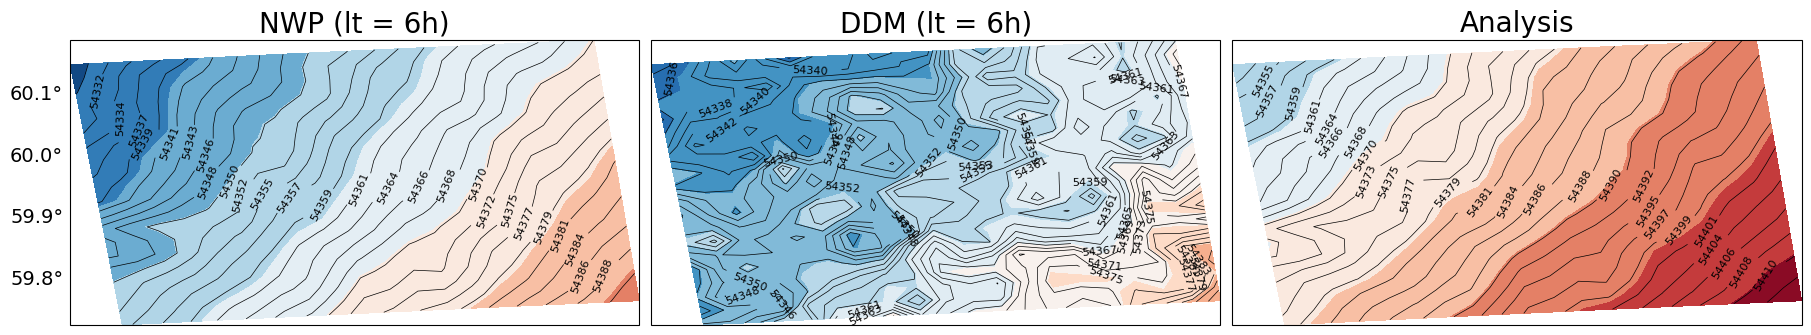

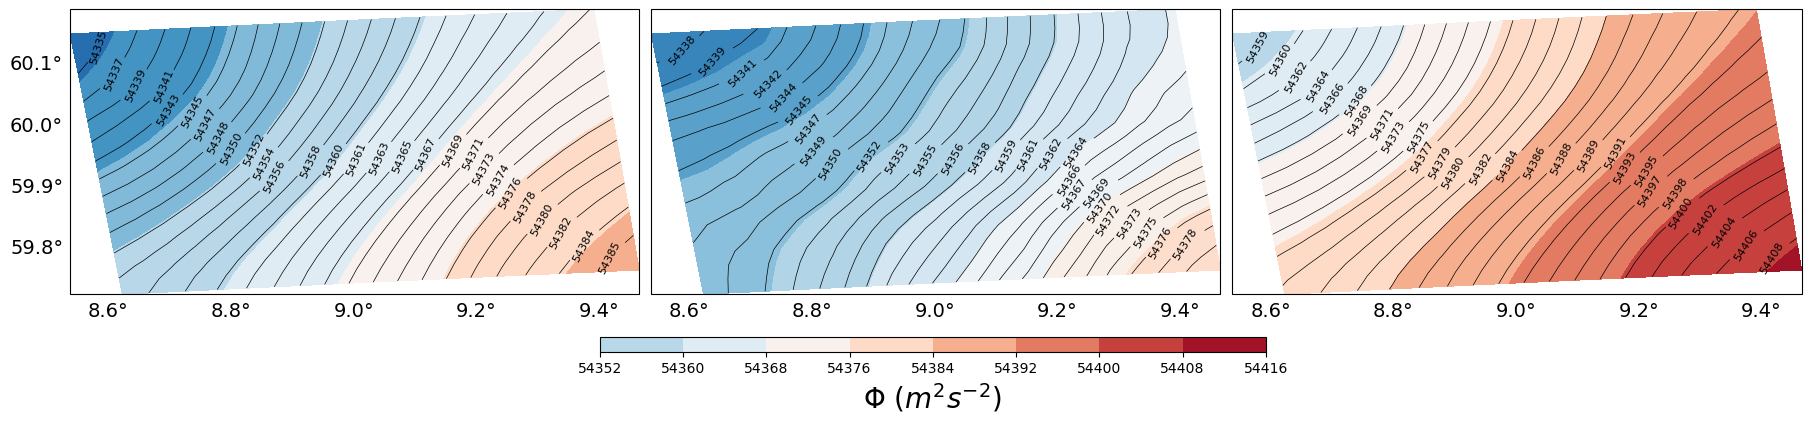

In [107]:
LAT_NWP = [381,401]
LON_NWP = [281,301]

LAT_DDM = [380,400]
LON_DDM = [280,300]

angles = get_angles(DDM_gt_00_0507,NWP_gt_00_0507,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP)
pl_selected = 500
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_00_0507, NWP_gt_06_0507, 6, DDM_pred_00_0507, DDM_gt_06_0507, 1) 

plot_geopotential_three_panel(
    NWP_pred_00_0507, DDM_pred_00_0507,
    LAT_NWP, LON_NWP, LAT_DDM, LON_DDM,
    Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1,
    cmap='RdBu_r', coastlines=True,
    titles=['NWP (lt = 6h)','DDM (lt = 6h)', 'Analysis'],
    geopotential_levels=30, vmin=54320, vmax=54420,
    figsize=(18, 5),
    colorbar = False, colorbar_label=r"$\Phi$ $(m^{2}/s^{2})$", 
    show_titles = True, show_xticklabels=False
)


plot_geopotential_three_panel(
    NWP_pred_00_0507, DDM_pred_00_0507,
    LAT_NWP, LON_NWP, LAT_DDM, LON_DDM,
    Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13,
    cmap='RdBu_r', coastlines=True,
    titles=['NWP','DDM', 'Analysis'],
    geopotential_levels=30, vmin=54320, vmax=54420,
    figsize=(18, 5), 
    colorbar = True, colorbar_label=r"$\Phi$ $(m^{2}s^{-2})$",
    show_titles = False, show_xticklabels=True
)

In [142]:
import matplotlib.ticker as mticker

def plot_geopotential_three_panel(NWP_data, DDM_data, 
                                 NWP_lat_range, NWP_lon_range,
                                 DDM_lat_range, DDM_lon_range,
                                 NWP_array, DDM_array, GT_array,
                                 cmap='RdBu_r', coastlines=True, 
                                 titles=['', '', ''],
                                 geopotential_levels=30, vmin=None, vmax=None,
                                 figsize=(16, 8), suptitle=None, colorbar=True, colorbar_label=True,
                                 show_titles=True, show_xticklabels=True,
                                 ylabel=None, cbar_fontsize=16, contour_fontsize=12,
                                 save_path = ""):  

    lat_nwp = NWP_data['latitude'][NWP_lat_range[0]:NWP_lat_range[1], 
                                  NWP_lon_range[0]:NWP_lon_range[1]].values
    lon_nwp = NWP_data['longitude'][NWP_lat_range[0]:NWP_lat_range[1], 
                                   NWP_lon_range[0]:NWP_lon_range[1]].values

    lat_ddm = DDM_data['latitude'][DDM_lat_range[0]:DDM_lat_range[1], 
                                  DDM_lon_range[0]:DDM_lon_range[1]].values
    lon_ddm = DDM_data['longitude'][DDM_lat_range[0]:DDM_lat_range[1], 
                                   DDM_lon_range[0]:DDM_lon_range[1]].values

    fig, (ax_nwp, ax_ddm, ax_gt) = plt.subplots(nrows=1, ncols=3, figsize=figsize,
                                                subplot_kw={'projection': ccrs.PlateCarree()},
                                                constrained_layout=True)

    nwp_plot = ax_nwp.contourf(lon_nwp, lat_nwp, NWP_array, cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ddm_plot = ax_ddm.contourf(lon_ddm, lat_ddm, DDM_array, cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    gt_plot  = ax_gt.contourf(lon_nwp, lat_nwp, GT_array,  cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

    if coastlines:
        for i, ax in enumerate([ax_nwp, ax_ddm, ax_gt]):
            ax.coastlines(resolution='10m', color='black', linewidth=0.5)
            gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
            
            gl.top_labels = gl.right_labels = False  
            
            if i == 0:
                gl.left_labels = True
            else:
                gl.left_labels = False  
            
            if show_xticklabels:
                gl.bottom_labels = True
            else:
                gl.bottom_labels = False
                
            gl.xlines = False
            gl.ylines = False
            
            gl.xlocator = mticker.FixedLocator(ax.get_xticks())
            gl.ylocator = mticker.FixedLocator(ax.get_yticks())
            
            # Use FuncFormatter with proper formatter objects
            gl.xformatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}°')
            gl.yformatter = mticker.FuncFormatter(lambda y, pos: f'{y:.1f}°')
            
            gl.xlabel_style = {'size': 14} 
            gl.ylabel_style = {'size': 14} 

    # 3. Plot fewer geopotential values with increased fontsize
    for ax, data, lon, lat in zip([ax_nwp, ax_ddm, ax_gt],
                                  [NWP_array, DDM_array, GT_array],
                                  [lon_nwp, lon_ddm, lon_nwp],
                                  [lat_nwp, lat_ddm, lat_nwp]):
        # Create fewer levels for cleaner contour labels
        n_levels = max(5, geopotential_levels // 1)  # Show about 1/6 of the levels
        levels = np.linspace(data.min(), data.max(), n_levels)
        
        cs = ax.contour(lon, lat, data, levels=levels, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
        
        # Create a list of levels to label (every other level)
        levels_to_label = levels[::3]  # This selects every other level

        # Label only the selected levels
        ax.clabel(cs, levels=levels_to_label, fmt='%1.0f', fontsize=contour_fontsize, inline=True)

    # 1. Add ylabel to the left of the most left plot
    if ylabel:
        # Add text to the figure, positioned to the left of the first subplot
        fig.text(-0.02, 0.5, ylabel, va='center', rotation='vertical', fontsize=20)

    if show_titles == True:
        for ax, title in zip([ax_nwp, ax_ddm, ax_gt], titles):
            ax.set_title(title, fontsize=20)

    # 2. Increase colorbar fontsize
    if colorbar:
        cbar_ax = fig.add_axes([0.33, 0.10, 0.37, 0.03]) 
        cbar = fig.colorbar(gt_plot, cax=cbar_ax, orientation='horizontal')
        if colorbar_label:
            cbar.set_label(colorbar_label, fontsize=cbar_fontsize)
        # Increase tick label fontsize as well
        cbar.ax.tick_params(labelsize=cbar_fontsize-6)
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

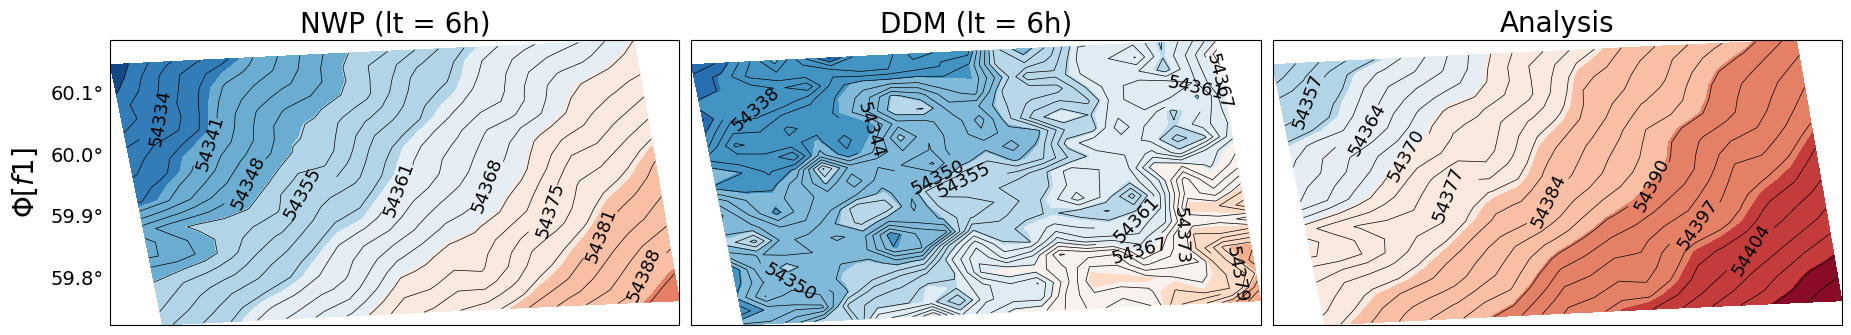

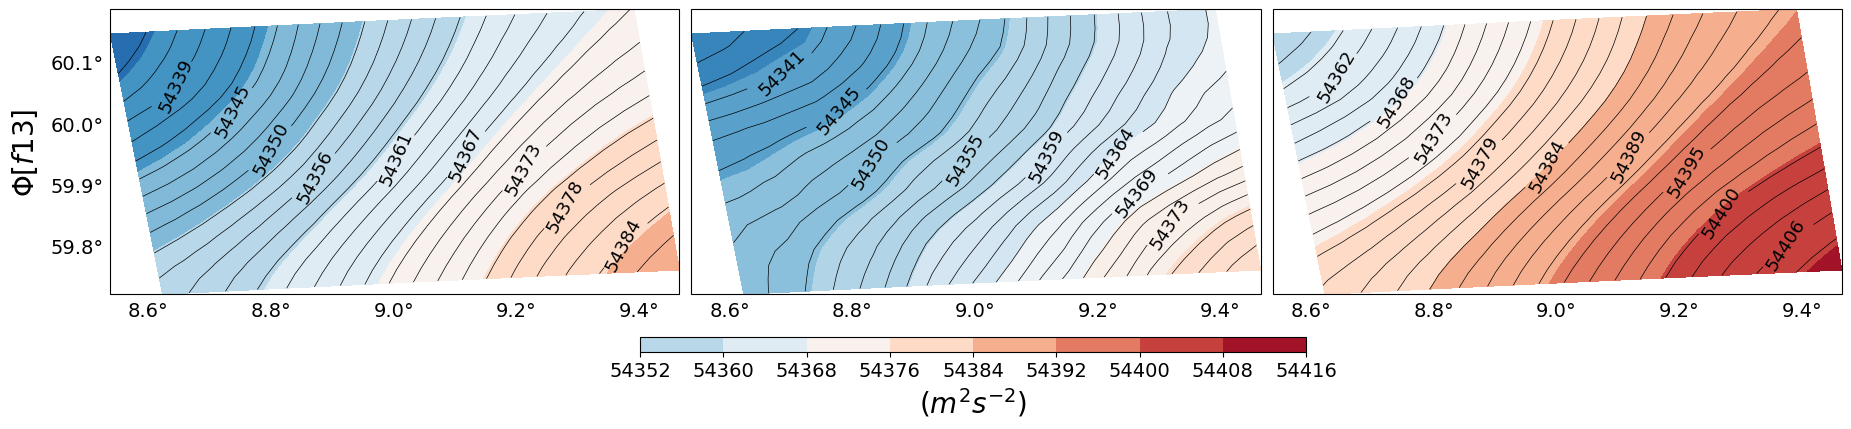

In [143]:
LAT_NWP = [381,401]
LON_NWP = [281,301]

LAT_DDM = [380,400]
LON_DDM = [280,300]

angles = get_angles(DDM_gt_00_0507,NWP_gt_00_0507,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP)
pl_selected = 500
Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1, Phi_gt_DDM_f1, Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13, Phi_gt_DDM_f13, diff_Phi_f1f13_NWP, diff_Phi_f1f13_DDM, diff_Phi_f1f13_gt_NWP, diff_Phi_f1f13_gt_DDM = get_geopotential_arrays(pl_selected,angles,LAT_DDM,LON_DDM,LAT_NWP,LON_NWP, NWP_pred_00_0507, NWP_gt_06_0507, 6, DDM_pred_00_0507, DDM_gt_06_0507, 1) 

plot_geopotential_three_panel(
    NWP_pred_00_0507, DDM_pred_00_0507,
    LAT_NWP, LON_NWP, LAT_DDM, LON_DDM,
    Phi_pred_NWP_f1, Phi_pred_DDM_f1, Phi_gt_NWP_f1,
    cmap='RdBu_r', coastlines=True,
    titles=['NWP (lt = 6h)','DDM (lt = 6h)', 'Analysis'],
    geopotential_levels=30, vmin=54320, vmax=54420,
    figsize=(18, 5),
    colorbar = False, colorbar_label=r"$(m^{2}/s^{2})$", 
    show_titles = True, show_xticklabels=False, 
    cbar_fontsize=20, contour_fontsize=13,
    ylabel = r"$\Phi[f1]$",
    save_path = ""
)


plot_geopotential_three_panel(
    NWP_pred_00_0507, DDM_pred_00_0507,
    LAT_NWP, LON_NWP, LAT_DDM, LON_DDM,
    Phi_pred_NWP_f13, Phi_pred_DDM_f13, Phi_gt_NWP_f13,
    cmap='RdBu_r', coastlines=True,
    titles=['NWP','DDM', 'Analysis'],
    geopotential_levels=30, vmin=54320, vmax=54420,
    figsize=(18, 5), 
    colorbar = True, colorbar_label=r"$(m^{2}s^{-2})$",
    show_titles = False, show_xticklabels=True,
    cbar_fontsize=20, contour_fontsize=13,
    ylabel = r"$\Phi[f13]$",
    save_path = ""
)